In [1]:
from scipy.signal import fftconvolve, convolve2d
from scipy.ndimage.filters import gaussian_filter
from astropy.io import fits
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
%matplotlib inline

In [2]:
#simulation = "/scratch/datasets/kat7_2000/"
#neural_output = "/home/gijs/Work/vacuum-cleaner/test/rewrite/fits/"

#simulation = "/scratch/datasets/meerkat16_deep2like/"
simulation = "/scratch/datasets/meerkat16_deep2like_morerange/"
#simulation = "/scratch/datasets/meerkat16_deep2like_morerange_512/"
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like/fits/"   #  2.834
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_sphe_noscale/fits/"   # 2.7635
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_allblack/fits/"  # 2.8523
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_morerange/fits/"  # 3.99


#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_morerange_withscale/fits/" # 3.135590717989963
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_map/fits/"  # 2.48
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_madandgan/fits/"  #  2.44
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_mad_scale_l1_100/fits/"  # 30000: 2.48 50000: 2.52
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_madandgan_nopsf/fits/"  # 2.77
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_madandgan_verylong/fits/"  # 2.56
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_madandganandl1_verylong/fits/"  # 2.43
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_res100_l1-200_gan1/fits/" # 2.46
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_deep2like_res100_l1-200_gan1_l0-1/fits/"  # 2.56
#neural_output = "/scratch/vacuum-cleaner/test/meerkat16_3800train_deep2like_res30_l1-200_gan1_l0-0.001_512/fits/"  # 10.000 - 2.86, 30.000 - 2.7
neural_output = "/scratch/vacuum-cleaner/test/generative/fits/"  # 4.1
#neural_output = "/scratch/vacuum-cleaner/test/generative_separable_conv/fits/"  # 3.11

In [3]:
def render(a, imgdata, title):
    i = a.pcolor(imgdata, cmap='cubehelix')
    f.colorbar(i, ax=a)
    a.set_title(title)
    
def open_fits(x):
    return fits.open(x)[0].data.squeeze()

def blur(m):
    return gaussian_filter(m, sigma=1)

def rms(x):
    return np.sqrt(np. mean(x**2))

def l0(x):
    return np.sum(x == 0)

In [4]:
std_wsclean = []
std_neural = []

l1_wsclean = []
l1_neural = []

l0_wsclean = []
l0_neural = []

mad_neural = []
mad_wsclean = []

start = 3800
end = 3900

for number in range(start, end):
    target_path = "{}{}-skymodel.fits".format(simulation, number)
    neural_model_path = "{}{}-outputs.fits".format(neural_output, number)
    wsclean_model_path = "{}{}-wsclean-model.fits".format(simulation, number)
    
    neural_residual_path = "{}{}-residuals.fits".format(neural_output, number)
    wsclean_residual_path = "{}{}-wsclean-residual.fits".format(simulation, number)
    
    dirty_path = "{}{}-wsclean-dirty.fits".format(simulation, number)
    
    residual_wsclean = open_fits(wsclean_residual_path)
    residual_neural = open_fits(neural_residual_path)
    
    target = open_fits(target_path)
    dirty = open_fits(dirty_path)
    neural_model = open_fits(neural_model_path)
    wsclean_model = open_fits(wsclean_model_path)
    
    if np.isnan(residual_wsclean).any():
        print("wsclean nan value " + str(number))
        continue
    
    if np.isnan(residual_neural).any():
        print("vacuum nan value " + str(number))
        continue
        
    l0_neural.append(l0(neural_model))
    l0_wsclean.append(l0(wsclean_model))
    
    l1_neural.append(np.sum(np.abs( neural_model - target)))
    l1_wsclean.append(np.sum(np.abs( wsclean_model - target)))
    
    #std_wsclean.append(np.std(residual_wsclean))
    #std_neural.append(np.std(residual_neural))
    
    std_wsclean.append(rms(residual_wsclean))
    std_neural.append(rms(residual_neural))
    
    mad_neural.append(np.mean(np.abs(residual_neural - np.mean(residual_neural))))
    mad_wsclean.append(np.mean(np.abs(residual_wsclean - np.mean(residual_wsclean))))

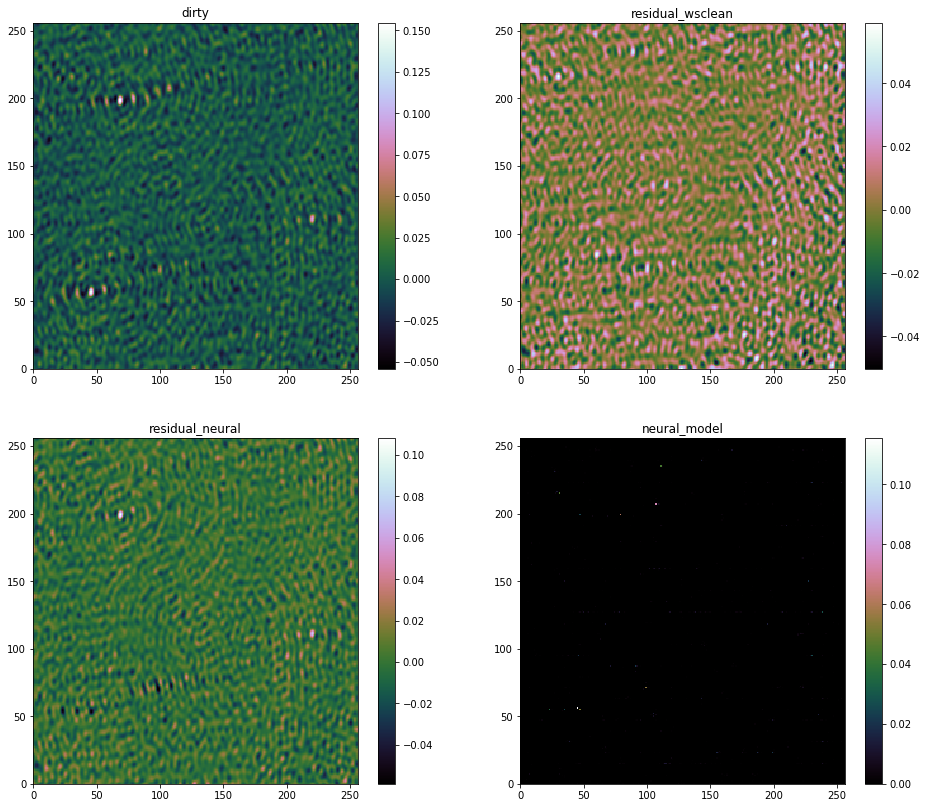

In [5]:
number = 3847
target_path = "{}{}-skymodel.fits".format(simulation, number)
neural_model_path = "{}{}-outputs.fits".format(neural_output, number)
wsclean_model_path = "{}{}-wsclean-model.fits".format(simulation, number)
neural_residual_path = "{}{}-residuals.fits".format(neural_output, number)
wsclean_residual_path = "{}{}-wsclean-residual.fits".format(simulation, number)
dirty_path = "{}{}-wsclean-dirty.fits".format(simulation, number)

residual_wsclean = open_fits(wsclean_residual_path)
residual_neural = open_fits(neural_residual_path)
target = open_fits(target_path)
dirty = open_fits(dirty_path)
neural_model = open_fits(neural_model_path)
wsclean_model = open_fits(wsclean_model_path)

f, ((a1, a2), (a3, a4)) = plt.subplots(2, 2, figsize=(16,14))
render(a1, dirty, 'dirty')
render(a2, residual_wsclean, 'residual_wsclean')
render(a3, residual_neural, 'residual_neural')
render(a4, neural_model, 'neural_model')

In [6]:
dirty

array([[ 0.0169065 ,  0.00783935, -0.00419326, ...,  0.00062136,
        -0.01013288, -0.01018075],
       [ 0.01257137,  0.00344562, -0.00571094, ..., -0.00131515,
        -0.01368104, -0.0120392 ],
       [ 0.00762222, -0.0007372 , -0.00640869, ..., -0.00058237,
        -0.01320106, -0.01053218],
       ...,
       [-0.00524908, -0.00668737, -0.00782426, ..., -0.01044446,
        -0.00696831,  0.00881576],
       [ 0.00082336, -0.00549486, -0.01246873, ..., -0.00942427,
        -0.01088291,  0.0030997 ],
       [ 0.00715339, -0.00401486, -0.01678601, ..., -0.00558931,
        -0.01165172, -0.00052383]], dtype=float32)

In [7]:
np.sum(neural_model == 0)

29137

In [8]:
neural_model_path

'/scratch/vacuum-cleaner/test/generative/fits/3847-outputs.fits'

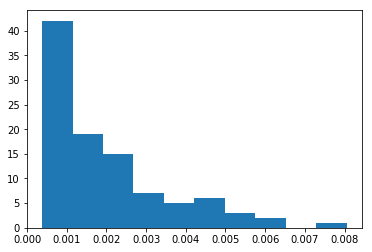

In [9]:
_ = plt.hist(mad_neural)

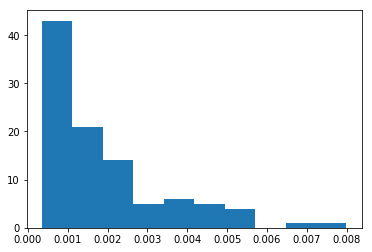

In [10]:
_ = plt.hist(mad_wsclean)

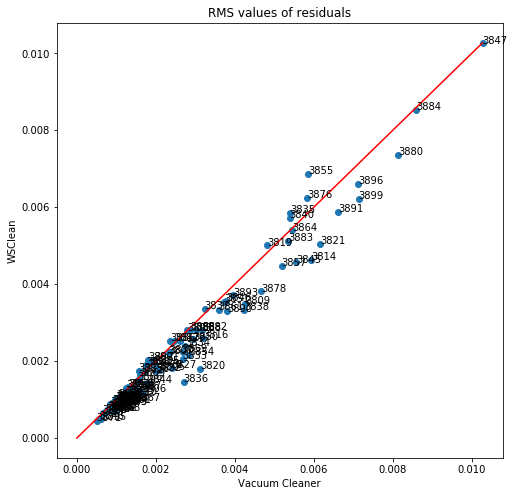

In [11]:
m = max(std_wsclean + std_neural)
f, (a1) = plt.subplots(1, 1, figsize=(8,8))
a1.plot(std_neural, std_wsclean, 'o')
a1.plot([0, m], [0, m], 'r-')
a1.set_xlabel('Vacuum Cleaner')
a1.set_ylabel('WSClean')
a1.set_title('RMS values of residuals')

#a1.set_aspect('equal')

for i, txt in enumerate(range(start, end)):
    a1.annotate(txt, (std_neural[i], std_wsclean[i]))

Text(0.5,1,'MAD values of residuals')

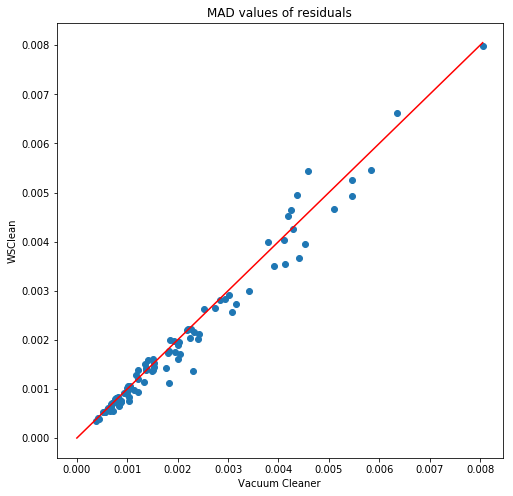

In [12]:
m = max(mad_wsclean + mad_neural)
f, (a1) = plt.subplots(1, 1, figsize=(8,8))
a1.plot(mad_neural, mad_wsclean, 'o')
a1.plot([0, m], [0, m], 'r-')
a1.set_xlabel('Vacuum Cleaner')
a1.set_ylabel('WSClean')
a1.set_title('MAD values of residuals')

#for i, txt in enumerate(range(start, end)):
#    a1.annotate(txt, (mad_neural[i], mad_wsclean[i]))

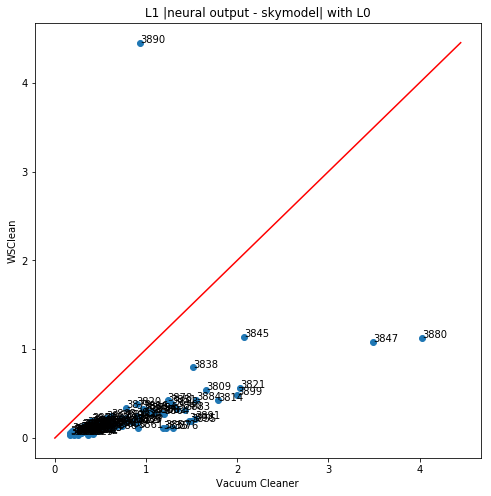

In [13]:
m = max(l1_wsclean + l1_neural)
f, (a1) = plt.subplots(1, 1, figsize=(8,8))
a1.plot(l1_neural, l1_wsclean, 'o')
a1.plot([0, m], [0, m], 'r-')
a1.set_xlabel('Vacuum Cleaner')
a1.set_ylabel('WSClean')
a1.set_title('L1 |neural output - skymodel| with L0')

for i, txt in enumerate(range(start, end)):
    a1.annotate(txt, (l1_neural[i], l1_wsclean[i]))

Text(0.5,1,'L0 model')

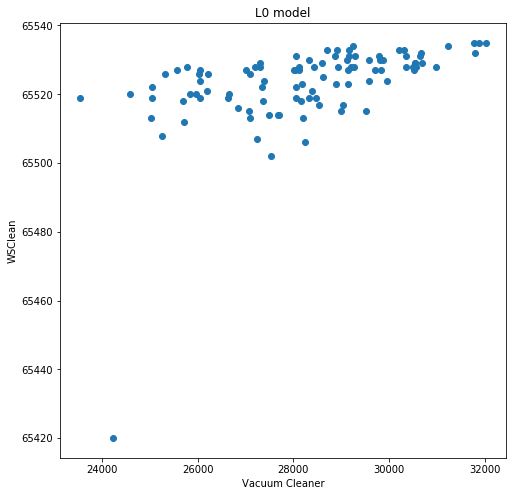

In [14]:
f, (a1) = plt.subplots(1, 1, figsize=(8,8))
a1.plot(l0_neural, l0_wsclean, 'o')
a1.set_xlabel('Vacuum Cleaner')
a1.set_ylabel('WSClean')
a1.set_title('L0 model')

In [15]:
sum(l1_neural), np.average(l1_neural), np.mean(l1_neural)

(76.91595543920994, 0.7691596, 0.7691596)

In [16]:
l1_scaling = 1/ np.average(l1_wsclean)
std_scaling = 1/ np.average(std_wsclean)

In [17]:
np.average(l1_wsclean) * l1_scaling + np.average(std_wsclean) * std_scaling   # should be 2.0

2.0

In [18]:
# this is our weighted scoring function, higher is worse, 2.0 is wsclean
np.average(l1_neural) * l1_scaling + np.average(std_neural) * std_scaling

4.172278020567064